In [35]:
from urllib.request import urlopen

In [32]:
import urllib.request,urllib.error
import requests as rs

In [33]:
import re

In [4]:
from bs4 import BeautifulSoup as bs

In [30]:
import urlopen

ModuleNotFoundError: No module named 'urlopen'

In [74]:
a = 'http://py4e-data.dr-chuck.net/known_by_Anayah.html'
f = re.search("[A-Z][a-z]+", a)
print(f.group(0))

Anayah


In [38]:
import ssl

In [ ]:
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

url = "http://py4e-data.dr-chuck.net/known_by_Bree.html"
res1 = urlopen(url, context=ctx).read()
soup = bs(res1, "html.parser")
a= []


numbers = soup.find_all("a")
for number in numbers:
    a.append(number.get('href'))
# print(a)
for value in a:

    f = re.search("[A-Z][a-z]+", value)
    a.append(f.group(0))

print(a[18])
#     a[18]


  


In [16]:
number = '<span class="comments">97</span>'
f =re.search("([0-9]+)",number)
int(f.group(0))

97











###  OBjectives
1. Revisiting the Outliers
2. Clustering- DBSCAN

Outerliers: Data is not part of general Representation

DBSCAN is used to identity the clusterless data.

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X, _ = make_blobs(n_features = 2, n_samples = 1000, centers=2, cluster_std = 2.5)

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'X2')

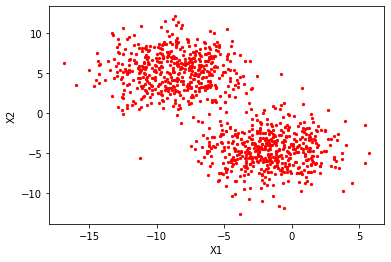

In [10]:
plt.scatter(X[:,0], X[:,1], s= 5, c = "red")
plt.xlabel("X1")
plt.ylabel("X2")

### Important notes about the DBSCAN

1. Not all the data will not be part of cluster
2. There will some data which is clusterless
3. DBSCAN will identity the that clusterless data.


### important note about the Standardscaler and minmaxscaler
1. Both the scaler modules are used to define the two columns scale in the same scale which can be pictoraily  defined


In [16]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [22]:
le = StandardScaler().fit_transform(X)

In [23]:
from sklearn.cluster import DBSCAN


In [66]:
ss = DBSCAN(eps = 2, min_samples=  10)

In [39]:
ss.fit(X)

DBSCAN(algorithm='auto', eps=1, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)

In [40]:
ss.labels_

array([-1,  0,  1,  0,  1,  0,  0,  1, -1, -1,  1,  1,  0,  0,  1,  0,  0,
        0,  1,  1,  1,  0,  0,  1,  0,  0,  0,  0,  1,  1,  0,  1,  0,  0,
        1,  1,  1,  0,  1,  1,  0,  0,  0,  0,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  0,  1,  1, -1,  0,  0, -1,  1,  1,  1,  0,  1,
        0, -1,  0,  1,  1, -1, -1,  0,  0,  1,  1,  1,  0,  1,  1,  0,  0,
        1,  0,  0,  0,  0,  0,  0,  1,  1,  1,  0, -1,  1, -1,  1,  0,  0,
        0,  0,  0,  0,  1,  1,  1,  1,  0,  0, -1,  0,  0, -1,  0,  1,  0,
        1,  1,  0,  0,  0,  0,  0,  1,  1,  1,  0,  1,  1,  0,  0,  1,  0,
       -1,  1,  1,  0,  0, -1,  1,  1,  1,  0,  0,  1,  0, -1,  1, -1,  1,
        0,  1,  1,  1,  0,  0,  1,  1,  1,  1,  1, -1,  0,  0,  0, -1,  0,
        0,  1,  0,  1, -1,  0,  1, -1,  1,  0,  0,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  0,  1,  1, -1,  0,  0,  0,  1,  1,  0,  0,  0,  0,
        1,  0,  1,  0,  0, -1,  0,  1,  0, -1,  0,  0,  0,  0, -1,  0, -1,
        0, -1,  0, -1, -1

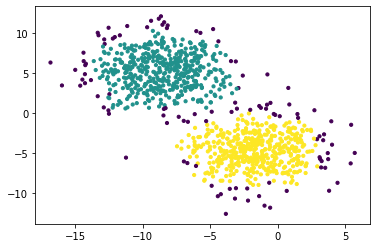

In [41]:
plt.scatter(X[:,0],X[:,1], c= ss.labels_, s=  10)

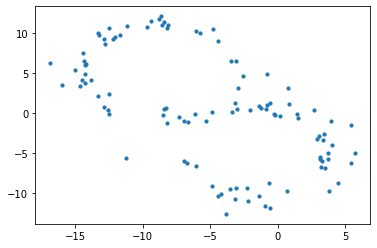

In [49]:
plt.scatter(X[ss.labels_==-1][:,0], X[ss.labels_==-1][:,1], s= 10)

In [89]:
centers = [[1,1],[-1,1],[-1,-1],[1,-1]]
X,labels_true = make_blobs(n_samples = 1000, n_features = 2, centers= centers, cluster_std = 0.4, random_state= 0)


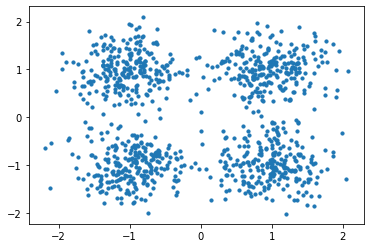

In [90]:
plt.scatter(X[:, 0], X[:,1], s= 10)

In [91]:
X =  StandardScaler().fit_transform(X)

In [92]:

db = DBSCAN(eps=.3, min_samples=10).fit(X)

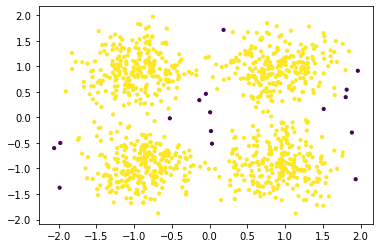

In [94]:
plt.scatter(X[:,0], X[:,1],s=10, c=db.labels_)

### DBSCAN on the house data , homes which are on outliers

In [96]:
import pandas as pd
import numpy as np

In [129]:
house_data = pd.read_csv("https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt", index_col = "Unnamed: 0")

In [130]:
house_data.sample(2)

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
203,1174.140,14,14,3,2,1,26000
317,1408.968,3,4,4,2,2,39999


In [131]:
from sklearn.preprocessing import StandardScaler

In [133]:
data = StandardScaler().fit_transform(house_data[["Sqft","Price"]])

In [134]:
from sklearn.cluster import DBSCAN

In [135]:
db  = DBSCAN(eps = 0.1, min_samples = 10).fit(data)

In [136]:
db.labels_

array([-1, -1,  2,  0, -1, -1,  2,  1,  0, -1,  1,  1,  0,  1, -1, -1,  1,
       -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  2,
        1, -1, -1, -1, -1,  3, -1,  1,  0, -1, -1,  0,  0, -1, -1,  1, -1,
       -1,  1,  3, -1, -1,  1,  0,  1,  0,  1,  3,  0, -1, -1, -1,  0,  1,
       -1, -1,  3,  0, -1, -1,  1, -1, -1, -1, -1,  3,  0,  1,  1,  1,  0,
        0, -1, -1, -1, -1,  5,  5,  0, -1, -1,  4,  5, -1,  4,  5, -1, -1,
       -1, -1, -1, -1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1,
        3,  1,  2, -1, -1, -1,  2,  2, -1,  0,  1, -1,  4, -1,  0, -1, -1,
        1, -1, -1, -1, -1,  2,  2,  0,  0,  1, -1, -1,  0,  4, -1, -1,  4,
        1, -1,  0,  1,  4,  0, -1, -1,  1,  1, -1,  0, -1, -1, -1,  0,  0,
       -1, -1, -1, -1,  3, -1, -1,  0,  0,  6, -1,  1, -1, -1,  0,  0, -1,
        0,  0, -1,  1,  1, -1, -1,  4, -1, -1,  1,  1, -1, -1, -1,  0, -1,
        0, -1,  1,  0, -1, -1, -1, -1, -1,  1,  0, -1,  4, -1,  1, -1,  2,
       -1, -1,  1, -1,  1

In [145]:
house_data["cluster"] = db.labels_



In [141]:
house_data.sample()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price,cluster
467,2067.198,4,14,4,2,2,100000,-1


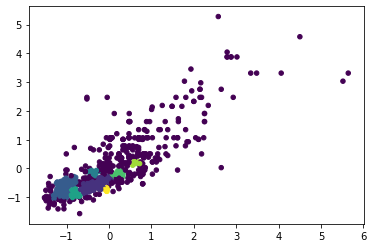

In [150]:
plt.scatter(data[:,0],data[:,1], c= db.labels_, s= 20)

In [ ]:
plt.scatter(data[:,0],data[:,1], c= db.labels_, s= 11)

In [156]:
a = np.zeros((3,3))
list.a

AttributeError: type object 'list' has no attribute 'a'

In [159]:
import numpy as np

In [160]:
np.array([1,3,33])

array([ 1,  3, 33])